# HOUSE PRICE PREDICTION BY XGboost

In [1]:
#imported all usefull liberary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
#read the data
df=pd.read_csv('pune_house_prices.csv')
df

,id,area,square_feet,num_bedrooms,num_bathrooms,year_built,has_garage,price
0,1,Viman Nagar,1521,1,1,2016,0,4315847
1,2,Kalyani Nagar,2957,1,2,2003,1,12861115
2,3,Pimpri-Chinchwad,2816,3,2,1993,0,8615274
3,4,Kalyani Nagar,2869,3,1,2000,1,5360008
4,5,Kalyani Nagar,1285,3,3,2012,0,6412778
...,...,...,...,...,...,...,...,...
99995,99996,Hinjewadi,2629,3,1,2007,0,10925108
99996,99997,Koregaon Park,1025,5,1,1993,0,3385039
99997,99998,Kalyani Nagar,1177,2,1,2015,0,7647345
99998,99999,Viman Nagar,2386,3,3,1985,1,8468781


In [3]:
#check the size of data
df.shape

(100000, 8)

In [4]:
#check for null
df.isna().sum()

id               0
area             0
square_feet      0
num_bedrooms     0
num_bathrooms    0
year_built       0
has_garage       0
price            0
dtype: int64

In [5]:
#check for describe
df.describe()

,id,square_feet,num_bedrooms,num_bathrooms,year_built,has_garage,price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,50000.500000,2151.193570,2.997380,1.999540,2001.515510,0.500730,8.490469e+06
std,28867.657797,777.705719,1.415321,0.817684,12.678245,0.500002,3.750052e+06
min,1.000000,800.000000,1.000000,1.000000,1980.000000,0.000000,2.000123e+06
25%,25000.750000,1480.000000,2.000000,1.000000,1991.000000,0.000000,5.242087e+06
50%,50000.500000,2153.000000,3.000000,2.000000,2001.000000,1.000000,8.500302e+06
75%,75000.250000,2822.000000,4.000000,3.000000,2013.000000,1.000000,1.172223e+07
max,100000.000000,3499.000000,5.000000,3.000000,2023.000000,1.000000,1.499994e+07


In [6]:
df=df.drop(['id'],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   area           100000 non-null  object
 1   square_feet    100000 non-null  int64 
 2   num_bedrooms   100000 non-null  int64 
 3   num_bathrooms  100000 non-null  int64 
 4   year_built     100000 non-null  int64 
 5   has_garage     100000 non-null  int64 
 6   price          100000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 5.3+ MB


In [8]:
df.drop_duplicates()

,area,square_feet,num_bedrooms,num_bathrooms,year_built,has_garage,price
0,Viman Nagar,1521,1,1,2016,0,4315847
1,Kalyani Nagar,2957,1,2,2003,1,12861115
2,Pimpri-Chinchwad,2816,3,2,1993,0,8615274
3,Kalyani Nagar,2869,3,1,2000,1,5360008
4,Kalyani Nagar,1285,3,3,2012,0,6412778
...,...,...,...,...,...,...,...
99995,Hinjewadi,2629,3,1,2007,0,10925108
99996,Koregaon Park,1025,5,1,1993,0,3385039
99997,Kalyani Nagar,1177,2,1,2015,0,7647345
99998,Viman Nagar,2386,3,3,1985,1,8468781


In [9]:
#apply EDA

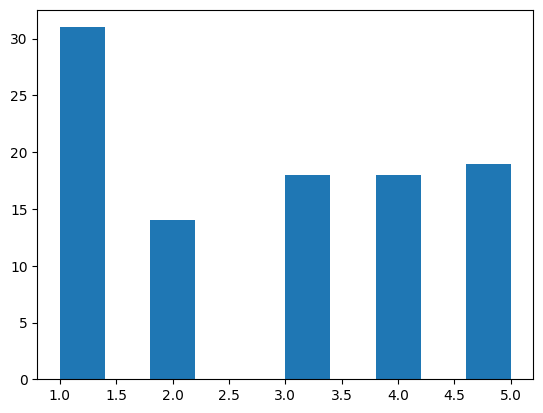

In [10]:
#univarity 
plt.hist(df['num_bedrooms'].head(100),label=True)     #for top 100 data sets
plt.show()

<Axes: xlabel='price', ylabel='Count'>

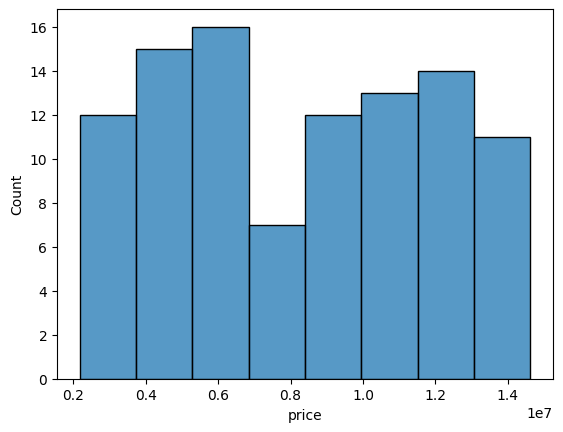

In [11]:
sns.histplot(df['price'].head(100))

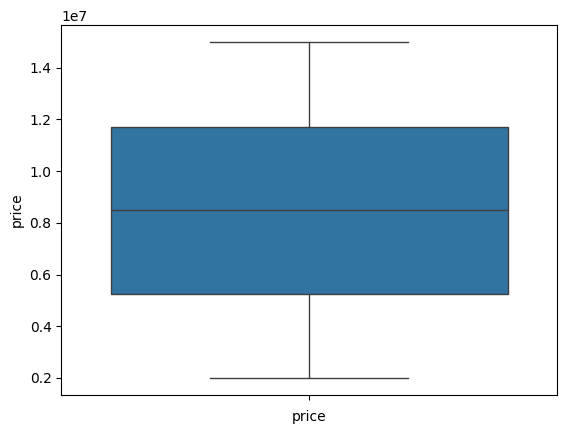

In [12]:
#box plot for price , we get the Q1,Q2,Q3,Q4 quantiles
sns.boxplot(df['price'])
plt.xlabel("price")
plt.show()

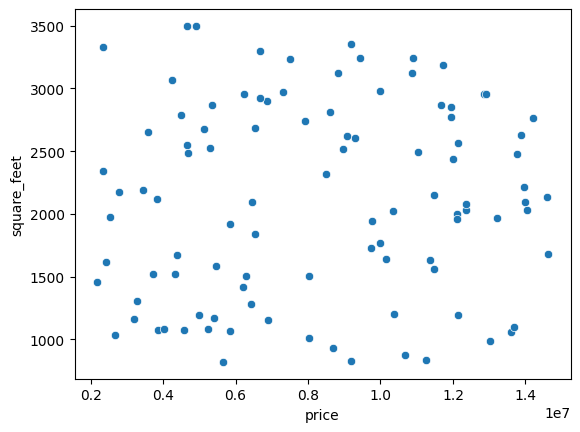

In [13]:
sns.scatterplot(x=df['price'].head(100),y=df['square_feet'].head(100))   # scatter plot for 1st 100 points
plt.show()

In [14]:
#preprocessing
from datetime import datetime

# Get today's year
year = datetime.today().year
df['year_built']=year-df['year_built']


# Feature engineering

In [15]:
# standard scaler for price and square_feet it means mean=0 and S.D=1
scalar=StandardScaler()
df['price']=scalar.fit_transform(df[['price']]).round(2)
df['square_feet']=scalar.fit_transform(df[['square_feet']]).round(2)

In [16]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['area']=label.fit_transform(df['area'])

# split the data 

In [17]:
x=df.iloc[:10000,:5] # trained on only 1000 data
y=df.iloc[:10000,:-1]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

# train the model

In [19]:
random=RandomForestRegressor(n_estimators=100,bootstrap=True)

In [20]:
random.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# prediction of x_test

In [21]:
y_predr=random.predict(x_test)

In [22]:
#final evaluation
score=r2_score(y_test,y_predr)
print("accuracy of the model is:\n",round(score,2))
print("*"*50)
print("MSE of the model is:\n",round(mean_squared_error(y_test,y_predr),2))
print("*"*50)
print("MAE of the model is: \n",round(mean_absolute_error(y_test,y_predr),2))

accuracy of the model is:
 0.76
**************************************************
MSE of the model is:
 0.09
**************************************************
MAE of the model is: 
 0.22


In [24]:
df.columns

Index(['area', 'square_feet', 'num_bedrooms', 'num_bathrooms', 'year_built',
       'has_garage', 'price'],
      dtype='object')

In [25]:
from xgboost import XGBRegressor

In [26]:
xg=XGBRegressor()

In [27]:
x=df.iloc[:,:5] # trained on only 1000 data
y=df.iloc[:,:-1]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
xg.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [31]:
y_predx=xg.predict(x_test)

In [33]:
#final evaluation
score=r2_score(y_test,y_predx)
print("accuracy of the model is:\n",round(score,2))
print("*"*50)
print("MSE of the model is:\n",round(mean_squared_error(y_test,y_predx),2))
print("*"*50)
print("MAE of the model is: \n",round(mean_absolute_error(y_test,y_predx),2))

accuracy of the model is:
 0.83
**************************************************
MSE of the model is:
 0.04
**************************************************
MAE of the model is: 
 0.08
